<a href="https://colab.research.google.com/github/preeti13456/Revmeup-App-Recommendation/blob/main/Revme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('reviews (1).csv')

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
X , y= df['Likes'],df['Comments']
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [ ]:
df.describe()

,Likes,Comments,Unnamed: 6
count,119.000000,119.000000,0.0
mean,2.319328,0.310924,NaN
std,3.132478,0.989332,NaN
min,0.000000,0.000000,NaN
25%,0.000000,0.000000,NaN
50%,1.000000,0.000000,NaN
75%,3.000000,0.000000,NaN
max,23.000000,9.000000,NaN


In [ ]:
print(df.shape)

(120, 7)


In [ ]:
df.isnull().sum()

PostId            0
Review            2
ProductId         0
Product Name      1
Likes             1
Comments          1
Unnamed: 6      120
dtype: int64

In [ ]:
df.dtypes

PostId           object
Review           object
ProductId        object
Product Name     object
Likes           float64
Comments        float64
Unnamed: 6      float64
dtype: object

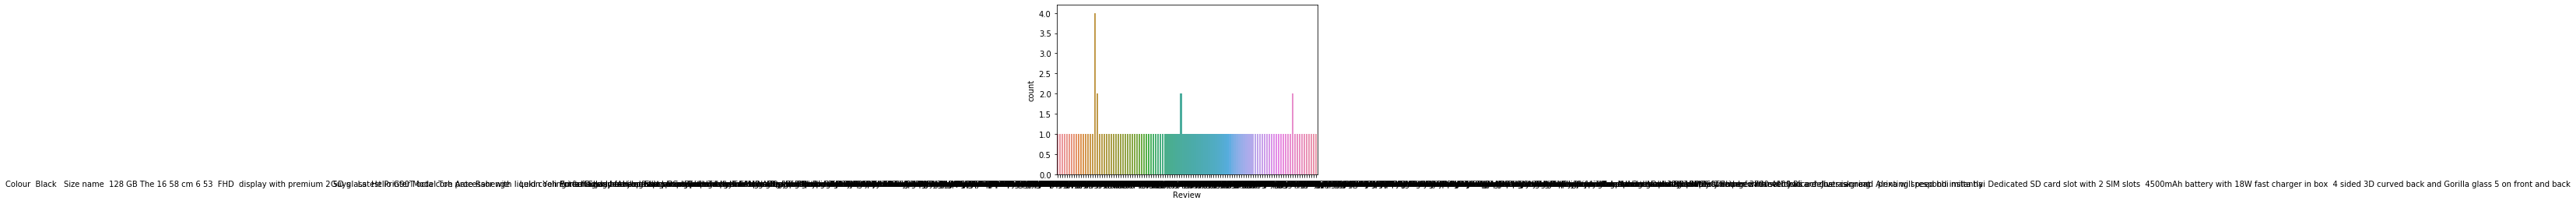

In [ ]:
sns.countplot(df['Review'])

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
X, y = df['Likes'],df['Comments']
a=X.values.reshape(-1,1)
b=y.values.reshape(-1,1)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(a, b, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
#d = reg.fit(X_train,y_train)
#d.reshape(-1,1)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_
lr.intercept_
lr.score(X_train, y_train)        #underfit

0.04499866085902404

In [ ]:
c = df["Review"].value_counts()

In [ ]:
c

VivoZ1X best in the market                                                                 4
SAMSUNG GALAXY M30 S                                                                       2
More performance Less price  Must buy to shift your parties  to another level              2
100   New age smartphone                                                                   2
redmi7A                                                                                    1
                                                                                          ..
An amazing device for you                                                                  1
Best Bass   Loud sound and Battery saver as automatically switch off when disconnected     1
Bass is superb  compact but volume is less                                                 1
Best for music  Best bass and vocal quality                                                1
The best of my all collections                                        

In [ ]:
e = c[1:3]

SAMSUNG GALAXY M30 S                                                                2
More performance Less price  Must buy to shift your parties  to another level       2
Name: Review, dtype: int64

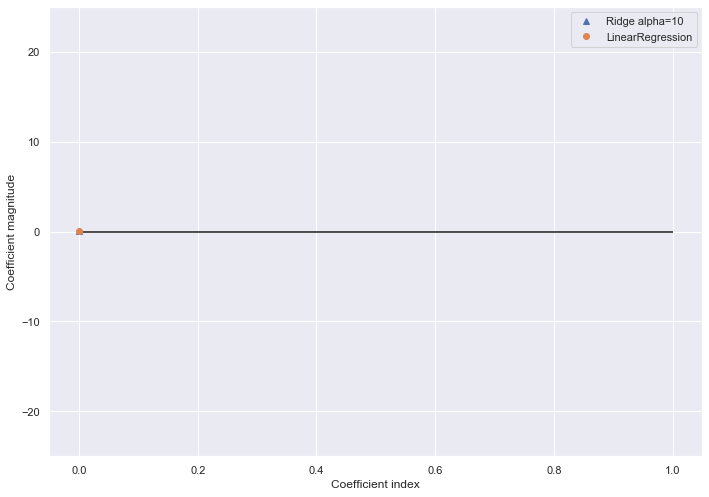

In [ ]:
from sklearn.linear_model import Ridge
ridge10 =Ridge(alpha=10).fit(X_train,y_train)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

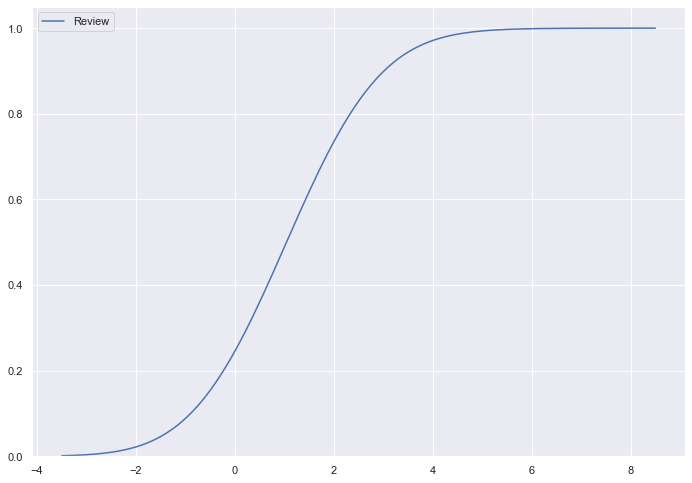

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(c, cumulative=True, bw=1.5)
plt.show()

In [ ]:
w = df["Product Name"].value_counts()
w

vivo s1 pro                         6
redmi note 8 pro                    4
redmi note 8                        4
jbl go 2                            3
samsung galaxy a50                  3
                                   ..
boat bassheads 900                  1
apple airpods with charging case    1
boat stone 170                      1
samsung galaxy m10s                 1
ultimate ears boom 3                1
Name: Product Name, Length: 70, dtype: int64

In [ ]:
d = np.asarray([c])
f = np.asarray([w])
u = d.reshape(-1,1)
v = f.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(u, v, random_state=0)
from sklearn.linear_model import Lasso
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

ValueError: Found input variables with inconsistent numbers of samples: [112, 70]

C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [112, 70]

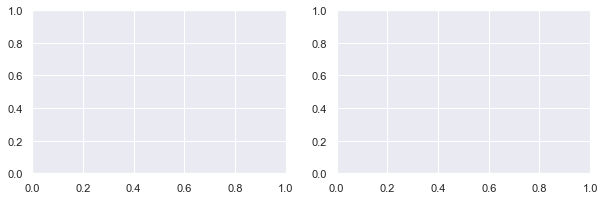

In [ ]:
!pip install mglearn
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = c, w
i = X.values.reshape(-1,1)
j = y.values.reshape(-1,1)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(i,j)
    mglearn.plots.plot_2d_separator(clf, i, fill=False, eps=0.5)
    mglearn.discrete_scatter(i[:, 0], i[:, 1], j, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

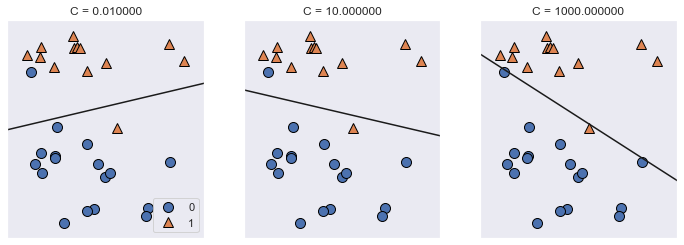

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\preeti sharma\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


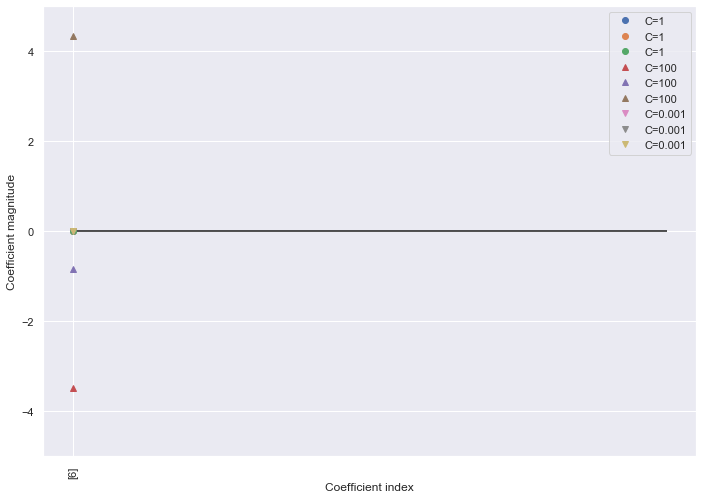

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(i[1:10]
                                        ,j[1:10])
logreg100 = LogisticRegression(C=100.0).fit(i[1:10]
                                        ,j[1:10])
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(i.shape[1]), j, rotation=90)
plt.hlines(0, 0, i.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

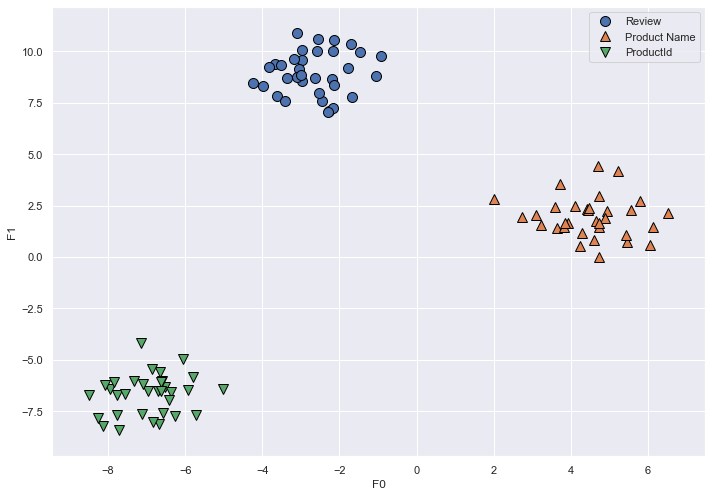

In [ ]:
from sklearn.datasets import make_blobs
i,j = make_blobs(random_state=42)
mglearn.discrete_scatter(i[:, 0], i[:, 1], j)
plt.xlabel("F0")
plt.ylabel("F1")
plt.legend(["Review","Product Name","ProductId"])


In [ ]:
linear_svm = LinearSVC().fit(i,j)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


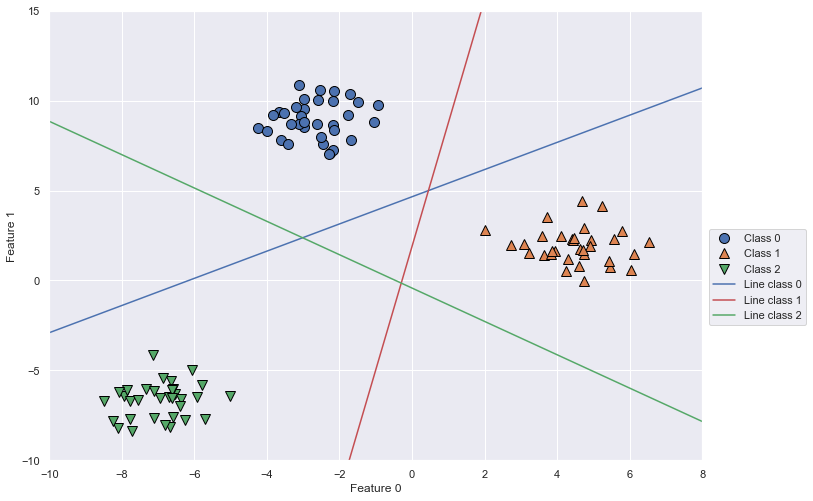

In [ ]:
mglearn.discrete_scatter(i[:, 0], i[:, 1], j)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

In [ ]:
X= np.array(w[2:5])
            
y = np.array(c[2:5])


In [ ]:
counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    print("Feature counts:\n{}".format(counts))

Feature counts:
{1: 3}
Feature counts:
{1: 3, 2: 7}
